# Employee Attrition Prediction
1. Cleaning data 2.EDA 3.Baseline model (supervised) 4.Improvisation 5.Baseline(Randon forest and logistic?) 6.Improvisation

In [221]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

In [222]:
df = pd.read_csv('hrdata.csv')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Cleaning

In [224]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [225]:
#df = df.drop(['Over18'], axis = 1)
mappingBusinesTravel = {'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3}
mappingBinary = {'Yes': 1, 'No': 0}
mappingDept = {'Sales':1,'Research & Development':2,'Human Resources':3}
mappingGender = {'Female':2, 'Male':1}
mappingMaritalStatus = {'Single':1,'Married':2,'Divorced':3}
mappingEduField = {'Life Sciences':1, 'Other':6, 'Medical':2, 'Marketing':3,
       'Technical Degree':4, 'Human Resources':5}
mappingJobRole = {'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician':3,
       'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6,
       'Sales Representative':7, 'Research Director':8, 'Human Resources':9}
df = df.replace({'BusinessTravel': mappingBusinesTravel,'Attrition':mappingBinary,'Department':mappingDept,
                 'OverTime':mappingBinary,'MaritalStatus':mappingMaritalStatus,
                 'Gender':mappingGender,'JobRole':mappingJobRole,'EducationField':mappingEduField})
df.JobRole.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [227]:
df.sample(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1463,31,0,3,325,2,5,3,2,1,2057,...,2,80,0,10,2,3,9,4,1,7
1434,52,0,3,585,1,29,4,1,1,2019,...,2,80,2,16,3,2,9,8,0,0
372,35,0,1,755,2,9,4,1,1,496,...,3,80,0,10,5,3,1,1,0,0
602,30,0,1,946,2,2,3,2,1,833,...,2,80,0,12,4,2,0,0,0,0
356,42,0,1,1332,2,2,4,6,1,477,...,2,80,0,14,6,3,1,0,0,0
437,30,0,1,413,1,7,1,3,1,585,...,1,80,0,4,3,3,3,2,1,2
910,23,0,1,373,2,1,2,1,1,1270,...,4,80,1,1,2,3,1,0,0,1
1278,36,0,1,1383,2,10,3,1,1,1790,...,4,80,1,15,1,3,12,8,5,7
1170,27,0,2,591,2,2,3,2,1,1648,...,3,80,0,6,0,2,4,2,1,2
567,34,0,1,304,1,2,3,6,1,786,...,3,80,0,6,5,3,6,5,1,4


In [228]:
df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

#### Removing redundant columns

In [229]:
df.Over18.unique()

array(['Y'], dtype=object)

In [230]:
df.EmployeeCount.unique()

array([1])

In [232]:
df.StandardHours.unique()

array([80])

In [233]:
df = df.drop(['Over18','EmployeeCount','StandardHours',], axis=1)

# Exploratory Data Analysis

###### We observe that the number of records for attrition and non attrition is unevenly balanced

<AxesSubplot:xlabel='Attrition', ylabel='count'>

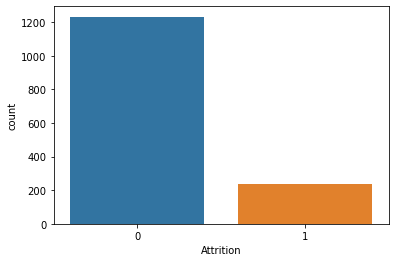

In [234]:
#df.groupby('Attrition').size().plot.bar()
sns.countplot(df['Attrition'])

######  Overall, male employees tend to leave the job almost twice as much as their female counterpart:

<AxesSubplot:xlabel='Gender'>

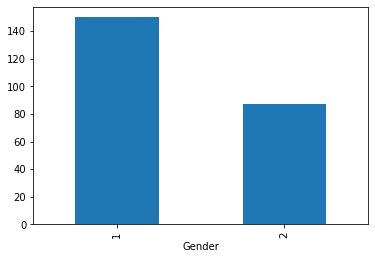

In [235]:
tmp = df[df['Attrition'] == 1]
#tmp['Attrition'].value_counts().size().plot.bar()
tmp.groupby('Gender').size().plot.bar()

###### put some more plots here

# Feature Engineering

###### Checking for highly correlated variables and removing them

In [240]:
cor_matrix = df.corr().abs()
#print(cor_matrix)
#upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)

<AxesSubplot:>

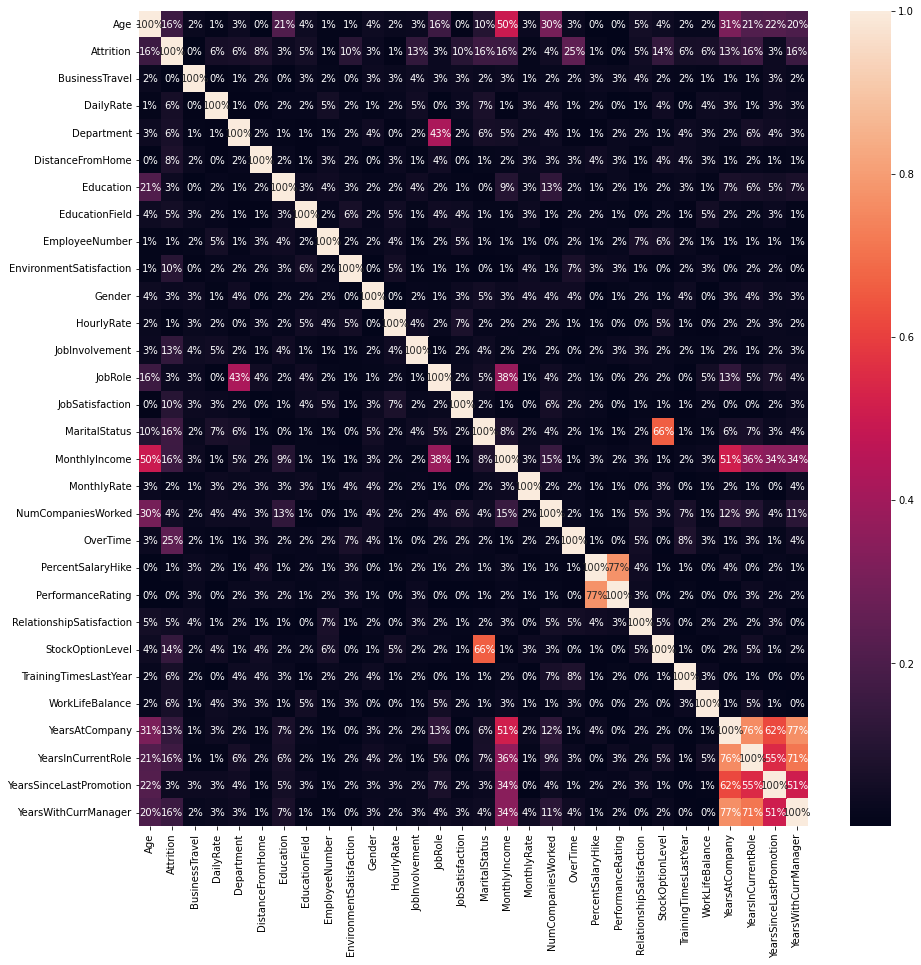

In [241]:
plt.figure(figsize=(15, 15))
sns.heatmap(cor_matrix, 
        xticklabels=cor_matrix.columns,
        yticklabels=cor_matrix.columns, annot=True, fmt='.0%')

### Removing correlated variables
The highly correlated data in our feature set are removed

In [238]:
df = df.drop(['TotalWorkingYears','JobLevel',], axis=1)

# Model Training

In [242]:
X = df.drop('Attrition', axis = 1)
Y = df['Attrition']

In [243]:
#Test train split:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

### Random Forest

In [244]:
#Create the model and train
RandomForestmodel = RandomForestClassifier()
RandomForestmodel.fit(X_train,y_train)

RandomForestClassifier()

In [245]:
#predict the results for test
y_pred = RandomForestmodel.predict(X_test)
#test the accuracy
accuracy_score(y_test, y_pred)

0.8342391304347826

In [246]:
f1_score(y_test, y_pred, average=None)

array([0.90715373, 0.2278481 ])

#### The accuracy score from the above is fairly good but we observe that the f-1 metrix is oddly low for one class. We now confirm the performance of our model with a classification report.

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       300
           1       0.82      0.13      0.23        68

    accuracy                           0.83       368
   macro avg       0.83      0.56      0.57       368
weighted avg       0.83      0.83      0.78       368



### We observe that even though we obtain a high overall accuracy score, the f1 metric and the recall for attrition is very less. We futher explore the data to understand why this is occuring

<AxesSubplot:xlabel='Attrition', ylabel='count'>

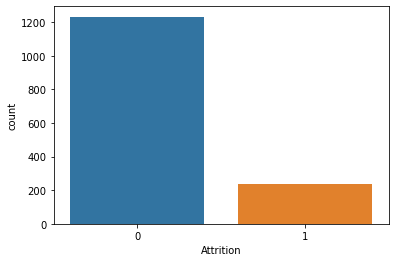

In [248]:
#df.groupby('Attrition').size().plot.bar()
sns.countplot(df['Attrition'])

##### we observe that the number of records for attrition and non attrition is unevenly balanced.

<AxesSubplot:>

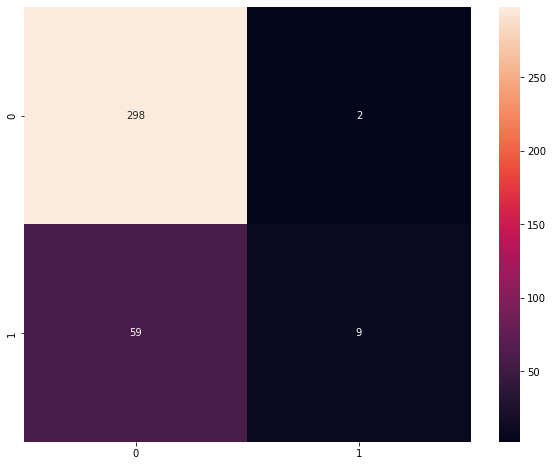

In [249]:
cf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix, annot=True, fmt='d')

##### From the above confusion matrix,  This skews our prediction and giving us an illusion of high accuracy albeit the very low accuracy to predict true-positive in case of attrition true scenario. From the confusion matrix, we observe a Type-2 error with false negative predictions of attrition data.

##### Since the number of records for attrition=true is very less, we perform oversampling of the dataset to even out the difference

In [250]:
from imblearn.over_sampling import SMOTE

In [251]:
y_train.count()

1102

In [252]:
smt = SMOTE()

In [253]:
x_res, y_res = smt.fit_resample(X, Y)

In [254]:
#Test train split:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=10)

#Create the model and train
RandomForestmodel.fit(X_train,y_train)

RandomForestClassifier()

In [255]:
#predict the results for test
y_pred = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, y_pred)

ValueError: X has 29 features, but DecisionTreeClassifier is expecting 31 features as input.

In [150]:
f1_score(y_test, y_pred, average=None)

array([0.92113565, 0.91666667])

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       311
           1       0.94      0.90      0.92       306

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [202]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       311
           1       0.92      0.91      0.91       306

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617



##### Logistic Regression with cross validation

In [173]:
logisticRegModel = LogisticRegressionCV(cv=5, random_state=0)
logisticRegModel.fit(X_train, y_train)
y_pred = logisticRegModel.predict(X_test)
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average=None)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       311
           1       0.73      0.72      0.72       306

    accuracy                           0.73       617
   macro avg       0.73      0.73      0.73       617
weighted avg       0.73      0.73      0.73       617

